In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
import sys
!{sys.executable} -m pip install citipy

In [26]:
from citipy import citipy

In [27]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [28]:
import requests

# Import the API key.
from config import weather_api_key

In [29]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [36]:
city_url = url + "&q=" + cities[i]
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b308a3eea4760c27335b527eb1aa8a1&q=mishkino


In [37]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [38]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [39]:
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]


In [40]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | athabasca
Processing Record 2 of Set 12 | robertsport
Processing Record 3 of Set 12 | busselton
Processing Record 4 of Set 12 | cockburn town
Processing Record 5 of Set 12 | khatanga
Processing Record 6 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 12 | hermanus
Processing Record 8 of Set 12 | north bend
Processing Record 9 of Set 12 | castro
Processing Record 10 of Set 12 | touros
Processing Record 11 of Set 12 | barrow
Processing Record 12 of Set 12 | kapaa
Processing Record 13 of Set 12 | bandarbeyla
Processing Record 14 of Set 12 | asahikawa
Processing Record 15 of Set 12 | kodiak
Processing Record 16 of Set 12 | caldwell
Processing Record 17 of Set 12 | port alfred
Processing Record 18 of Set 12 | qaanaaq
Processing Record 19 of Set 12 | cape town
Processing Record 20 of Set 12 | east london
Processing Record 21 of Set 12 | vaini
Processing Record 22 of Set 12 | rikitea
Processing Record 23 of Set 12 | saint-philipp

Processing Record 32 of Set 15 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 15 | taoudenni
Processing Record 34 of Set 15 | tshikapa
Processing Record 35 of Set 15 | mansa
Processing Record 36 of Set 15 | sao raimundo nonato
Processing Record 37 of Set 15 | souillac
Processing Record 38 of Set 15 | mercedes
Processing Record 39 of Set 15 | menongue
Processing Record 40 of Set 15 | lazaro cardenas
Processing Record 41 of Set 15 | kincardine
Processing Record 42 of Set 15 | plettenberg bay
Processing Record 43 of Set 15 | san mateo del mar
Processing Record 44 of Set 15 | teguise
Processing Record 45 of Set 15 | lompoc
Processing Record 46 of Set 15 | keflavik
Processing Record 47 of Set 15 | college
Processing Record 48 of Set 15 | oum hadjer
Processing Record 49 of Set 15 | labuhan
Processing Record 50 of Set 15 | bengkulu
Processing Record 1 of Set 16 | zlobin
Processing Record 2 of Set 16 | tromso
Processing Record 3 of Set 16 | nanakuli
Processing Record 4 of S

Processing Record 16 of Set 19 | uwayl
City not found. Skipping...
Processing Record 17 of Set 19 | sawakin
Processing Record 18 of Set 19 | jeremie
Processing Record 19 of Set 19 | palafrugell
Processing Record 20 of Set 19 | sibu
Processing Record 21 of Set 19 | sabibah
City not found. Skipping...
Processing Record 22 of Set 19 | namtsy
Processing Record 23 of Set 19 | komsomolskiy
Processing Record 24 of Set 19 | phan rang
City not found. Skipping...
Processing Record 25 of Set 19 | poum
Processing Record 26 of Set 19 | caravelas
Processing Record 27 of Set 19 | izhma
Processing Record 28 of Set 19 | olovyannaya
Processing Record 29 of Set 19 | grindavik
Processing Record 30 of Set 19 | hovd
Processing Record 31 of Set 19 | dubti
Processing Record 32 of Set 19 | boysun
Processing Record 33 of Set 19 | tatarskaya kargala
Processing Record 34 of Set 19 | singapore
Processing Record 35 of Set 19 | victoria
Processing Record 36 of Set 19 | assiniboia
Processing Record 37 of Set 19 | nam

Processing Record 3 of Set 23 | riyadh
Processing Record 4 of Set 23 | viedma
Processing Record 5 of Set 23 | ciudad bolivar
Processing Record 6 of Set 23 | tilichiki
Processing Record 7 of Set 23 | banda aceh
Processing Record 8 of Set 23 | gat
Processing Record 9 of Set 23 | poland
Processing Record 10 of Set 23 | powell river
Processing Record 11 of Set 23 | cheuskiny
City not found. Skipping...
Processing Record 12 of Set 23 | harnosand
Processing Record 13 of Set 23 | mount gambier
Processing Record 14 of Set 23 | prince rupert
Processing Record 15 of Set 23 | sambava
Processing Record 16 of Set 23 | tigil
Processing Record 17 of Set 23 | pontes e lacerda
Processing Record 18 of Set 23 | jinka
Processing Record 19 of Set 23 | houma
Processing Record 20 of Set 23 | westlock
Processing Record 21 of Set 23 | dzhebariki-khaya
Processing Record 22 of Set 23 | kalmunai
Processing Record 23 of Set 23 | dengzhou
Processing Record 24 of Set 23 | hailar
Processing Record 25 of Set 23 | even

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Athabasca,54.7169,-113.2854,45.48,39,47,7.29,CA,2021-09-24 02:09:24
1,Robertsport,6.7533,-11.3686,78.37,84,100,6.80,LR,2021-09-24 02:09:24
2,Busselton,-33.6500,115.3333,58.05,55,0,12.68,AU,2021-09-24 02:05:40
3,Cockburn Town,21.4612,-71.1419,83.32,75,100,10.58,TC,2021-09-24 02:06:43
4,Khatanga,71.9667,102.5000,34.34,88,96,4.65,RU,2021-09-24 02:00:54
5,Hermanus,-34.4187,19.2345,56.89,89,11,8.41,ZA,2021-09-24 02:06:07
6,North Bend,43.4065,-124.2243,64.92,82,1,12.66,US,2021-09-24 02:09:26
7,Castro,-24.7911,-50.0119,49.77,95,10,5.95,BR,2021-09-24 02:01:56
8,Touros,-5.1989,-35.4608,77.90,79,61,15.05,BR,2021-09-24 02:09:10
9,Barrow,71.2906,-156.7887,28.42,86,90,4.61,US,2021-09-24 02:06:35


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Athabasca,CA,2021-09-24 02:09:24,54.7169,-113.2854,45.48,39,47,7.29
1,Robertsport,LR,2021-09-24 02:09:24,6.7533,-11.3686,78.37,84,100,6.80
2,Busselton,AU,2021-09-24 02:05:40,-33.6500,115.3333,58.05,55,0,12.68
3,Cockburn Town,TC,2021-09-24 02:06:43,21.4612,-71.1419,83.32,75,100,10.58
4,Khatanga,RU,2021-09-24 02:00:54,71.9667,102.5000,34.34,88,96,4.65
5,Hermanus,ZA,2021-09-24 02:06:07,-34.4187,19.2345,56.89,89,11,8.41
6,North Bend,US,2021-09-24 02:09:26,43.4065,-124.2243,64.92,82,1,12.66
7,Castro,BR,2021-09-24 02:01:56,-24.7911,-50.0119,49.77,95,10,5.95
8,Touros,BR,2021-09-24 02:09:10,-5.1989,-35.4608,77.90,79,61,15.05
9,Barrow,US,2021-09-24 02:06:35,71.2906,-156.7887,28.42,86,90,4.61


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

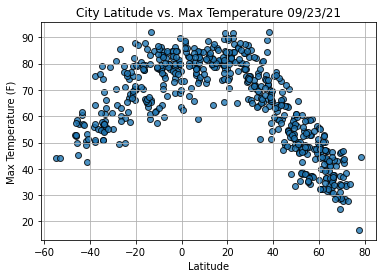

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

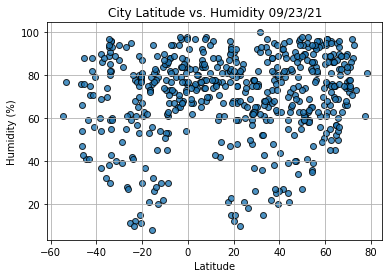

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

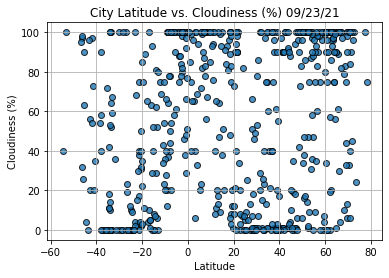

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

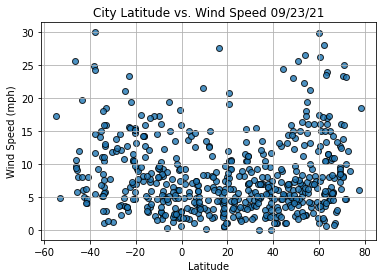

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()